#### Problem Statement
The Food Allergens Dataset is a collection of information regarding allergens present in various food items. The dataset contains allergen information for a range of food ingredients, enabling the identification and analysis of potential allergens in different dishes and products. It serves as a valuable resource for researchers, food manufacturers, healthcare professionals, and individuals with food allergies.

Size: The dataset consists of a total of 400 records, with each record representing a specific food item and its associated allergens.

Allergens: The dataset includes a comprehensive list of allergens found in the food items. These allergens encompass a wide range of ingredients, such as dairy, wheat, nuts (almonds, peanuts, pine nuts), seafood (anchovies, fish, shellfish), grains (oats, rice), animal-based ingredients (chicken, pork), plant-based ingredients (celery, mustard, soybeans), and common ingredients (cocoa, eggs). Additionally, the dataset contains entries where no specific allergens are listed.

Data Structure - The dataset is structured with multiple columns to provide detailed information. The columns include:

Food Item: Represents the name of the food item.
Ingredients: Lists the ingredients present in the food item, categorized into different columns such as sugar, salt, oil, spices, etc.
Allergens: Indicates the allergens associated with the food item, including the specific allergenic ingredients present.
Prediction : food products containing allergens and those that do not (contains , do not contains)
Potential Models and Analysis:

Allergen Detection Model: can predict whether it contains allergens or not

Ingredient Similarity Analysis: This analysis can provide insights into similarities and differences among different types of dishes.

Allergen Prevalence Analysis: Can gain insights into the prevalence of different allergens in food products.

Recommender Systems: The dataset can also be used to develop recommender systems for individuals with specific dietary restrictions or allergies.


View less
Usability
10.00

License
CC0: Public Domain

Expected update frequency
Monthly

Tags

Computer Science

Health

Food

Health Conditions

Classification

Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, auc, roc_auc_score, classification_report, roc_curve 
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split

%matplotlib inline

In [2]:
#loading the dataset
df = pd.read_csv('food_ingredients_and_allergens.csv')
df.head()

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Prediction
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",Contains
1,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",Contains
2,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",Contains
3,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",Contains
4,Cheddar Cheese,Cheese,None,None,Salt,Dairy,Contains


In [3]:
df.info()#checking for data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Food Product     399 non-null    object
 1   Main Ingredient  399 non-null    object
 2   Sweetener        399 non-null    object
 3   Fat/Oil          399 non-null    object
 4   Seasoning        399 non-null    object
 5   Allergens        399 non-null    object
 6   Prediction       398 non-null    object
dtypes: object(7)
memory usage: 21.9+ KB


In [4]:
df.isnull().sum()#checking for missing values

Food Product       0
Main Ingredient    0
Sweetener          0
Fat/Oil            0
Seasoning          0
Allergens          0
Prediction         1
dtype: int64

#### Exploratory Data Analysis

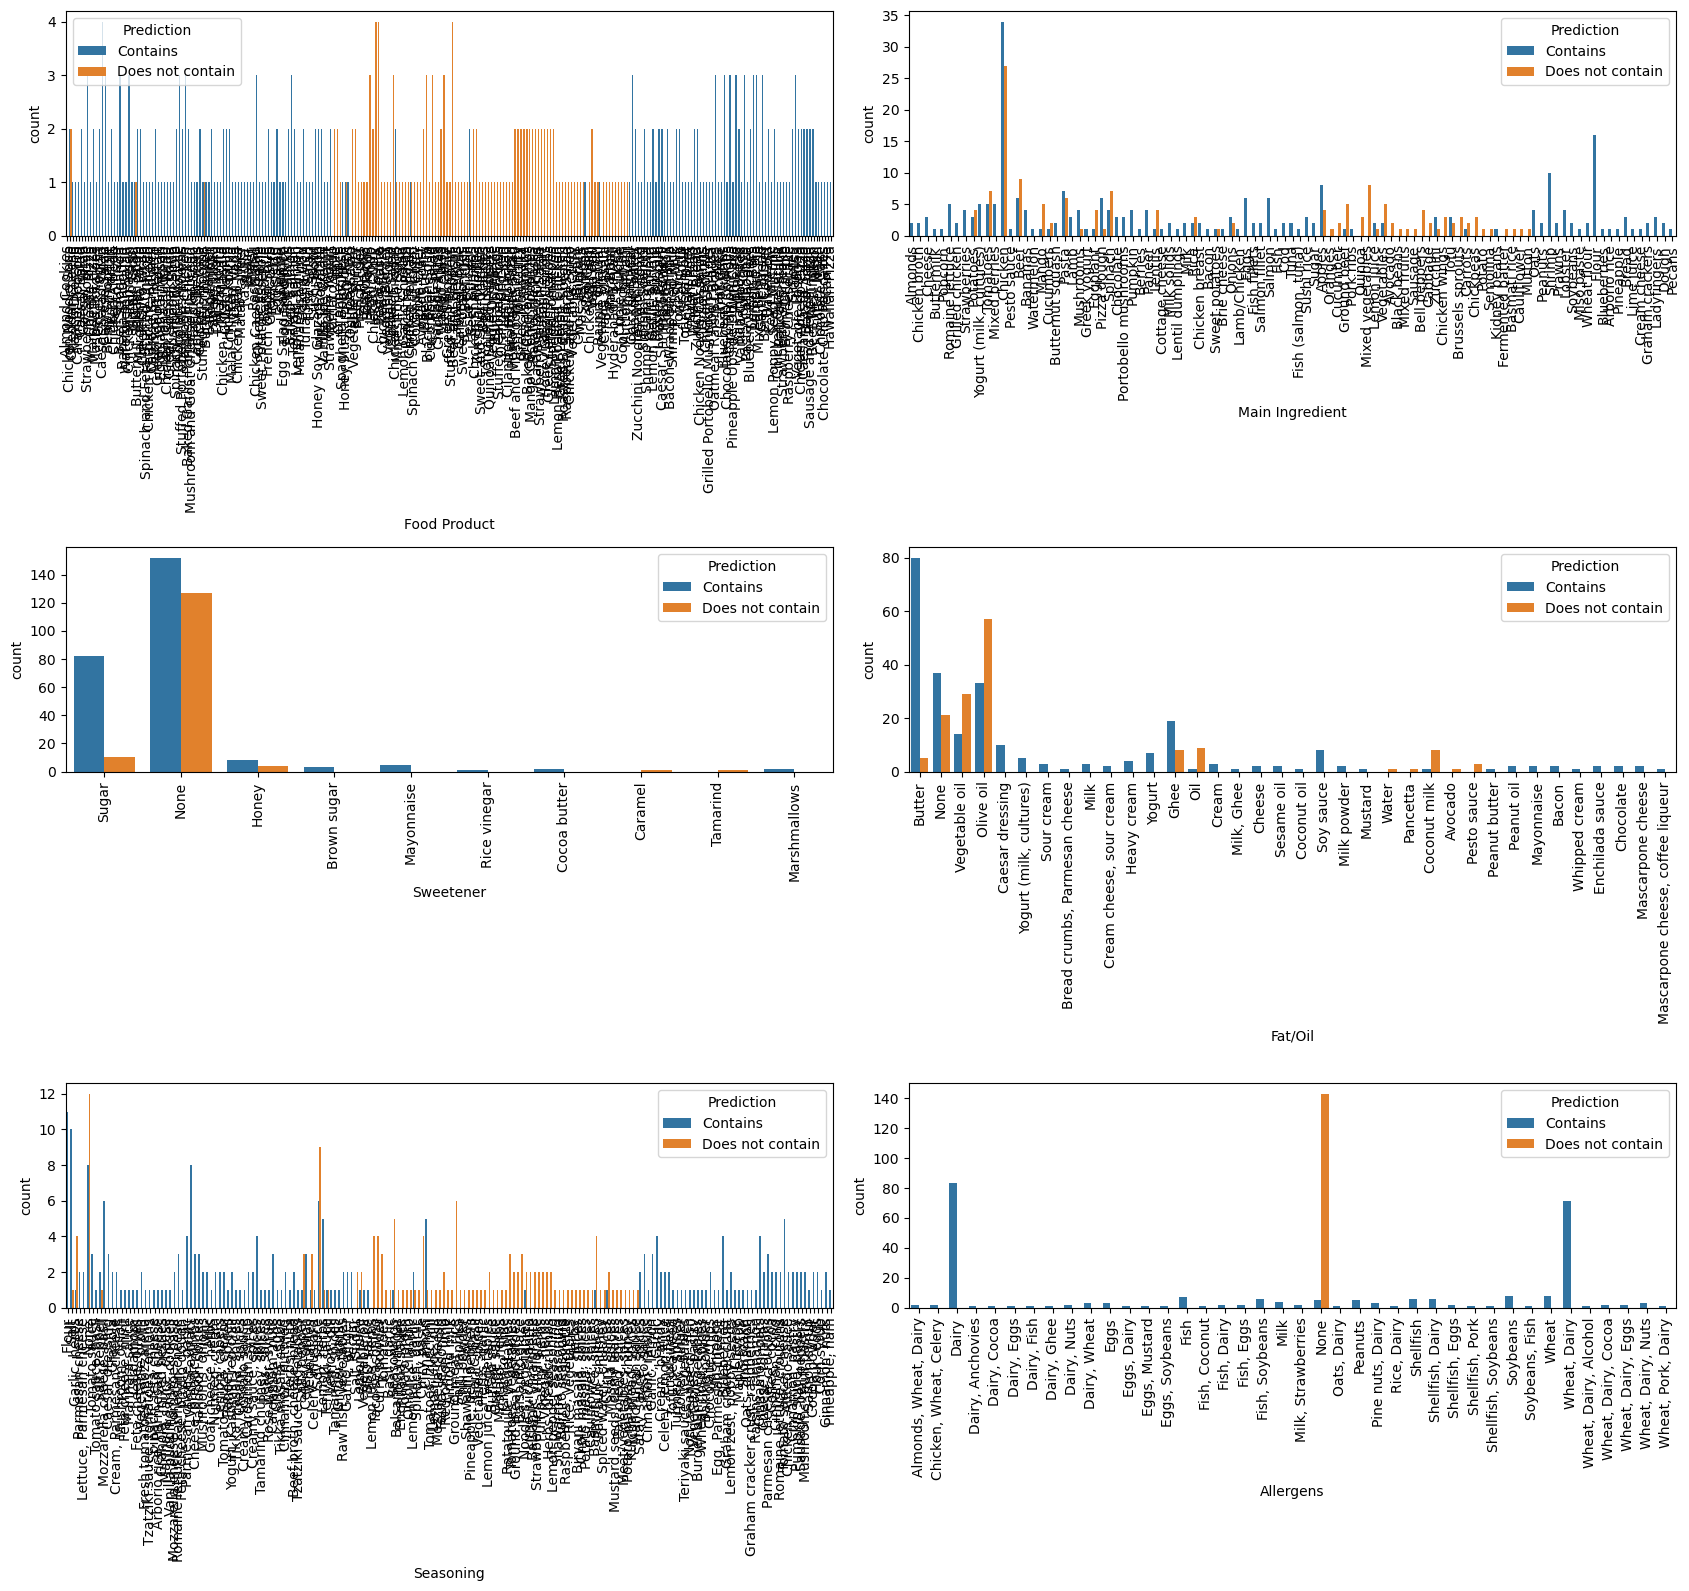

In [5]:
# list of column of categorical variables to plot
cat_vars = ['Food Product', 'Main Ingredient', 'Sweetener', 'Fat/Oil', 'Seasoning', 'Allergens']

# create figure with subplots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(17, 16))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='Prediction', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

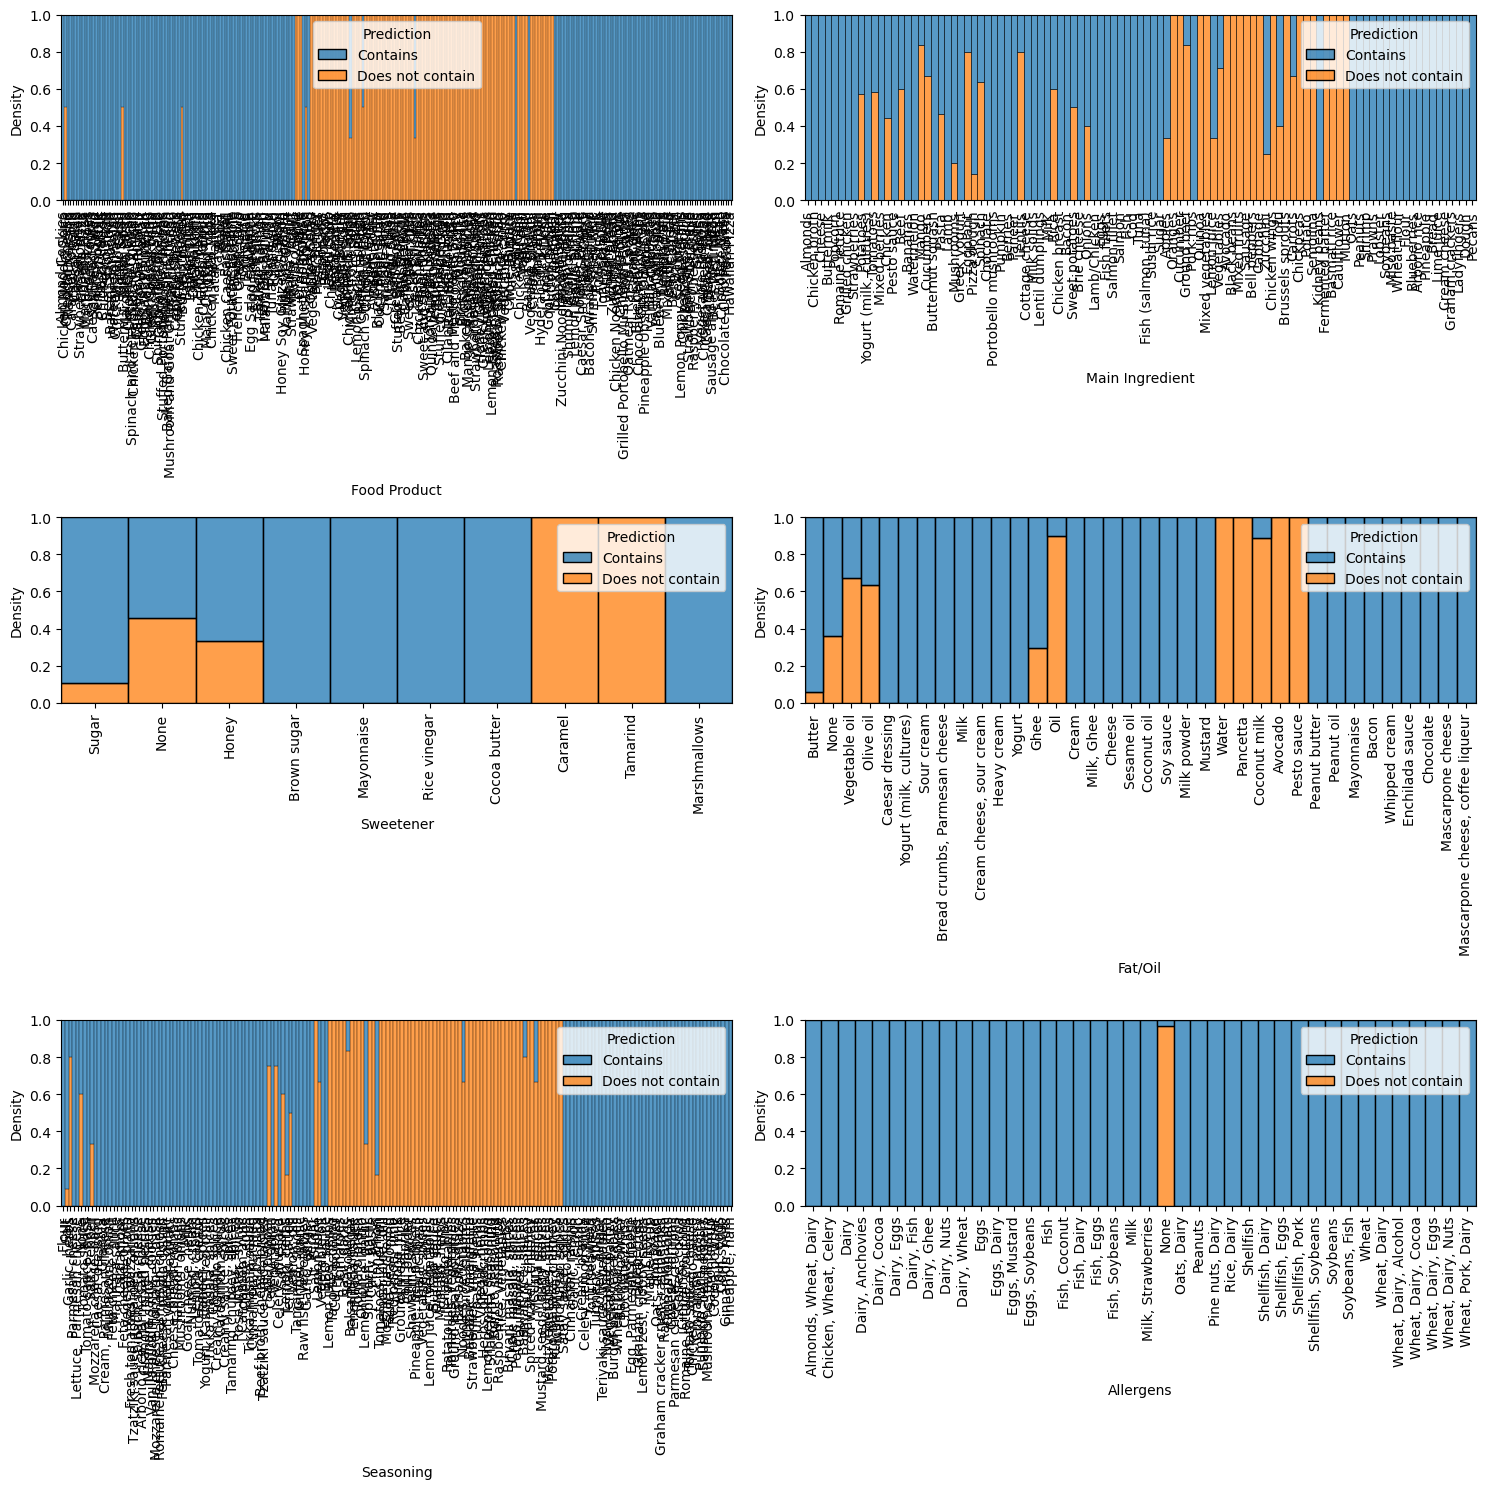

In [6]:
import warnings
warnings.filterwarnings("ignore")
# get list of categorical variables
cat_vars = ['Food Product', 'Main Ingredient', 'Sweetener', 'Fat/Oil', 'Seasoning', 'Allergens']

# create figure with subplots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axs = axs.flatten()

# create histplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.histplot(x=var, hue='Prediction', data=df, ax=axs[i], multiple="fill", kde=False, element="bars", fill=True, stat='density')
    axs[i].set_xticklabels(df[var].unique(), rotation=90)
    axs[i].set_xlabel(var)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

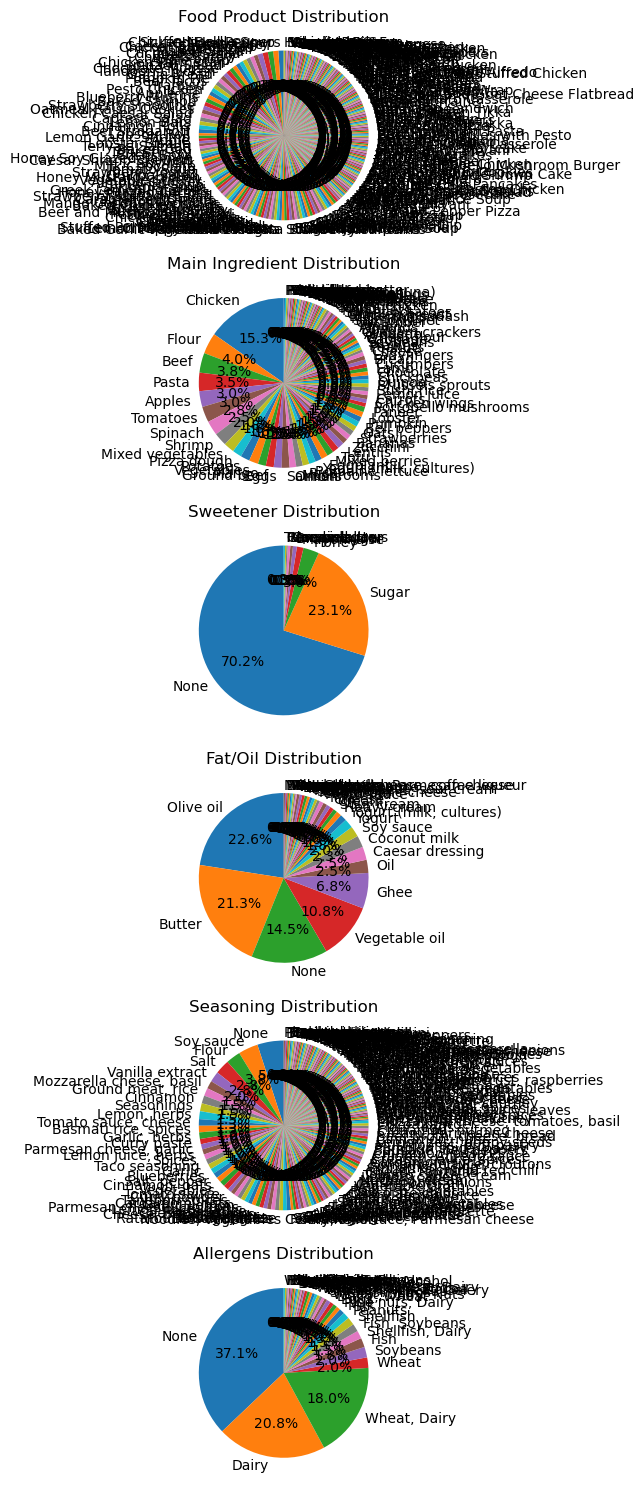

In [7]:
cat_vars = ['Food Product', 'Main Ingredient', 'Sweetener', 'Fat/Oil', 'Seasoning', 'Allergens']

# create a figure and axes
fig, axs = plt.subplots(nrows=6, ncols=1, figsize=(15, 15))

# create a pie chart for each categorical variable
for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        # count the number of occurrences for each category
        cat_counts = df[var].value_counts()

        # create a pie chart
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)

        # set a title for each subplot
        axs.flat[i].set_title(f'{var} Distribution')

# adjust spacing between subplots
fig.tight_layout()

# show the plot
plt.show()

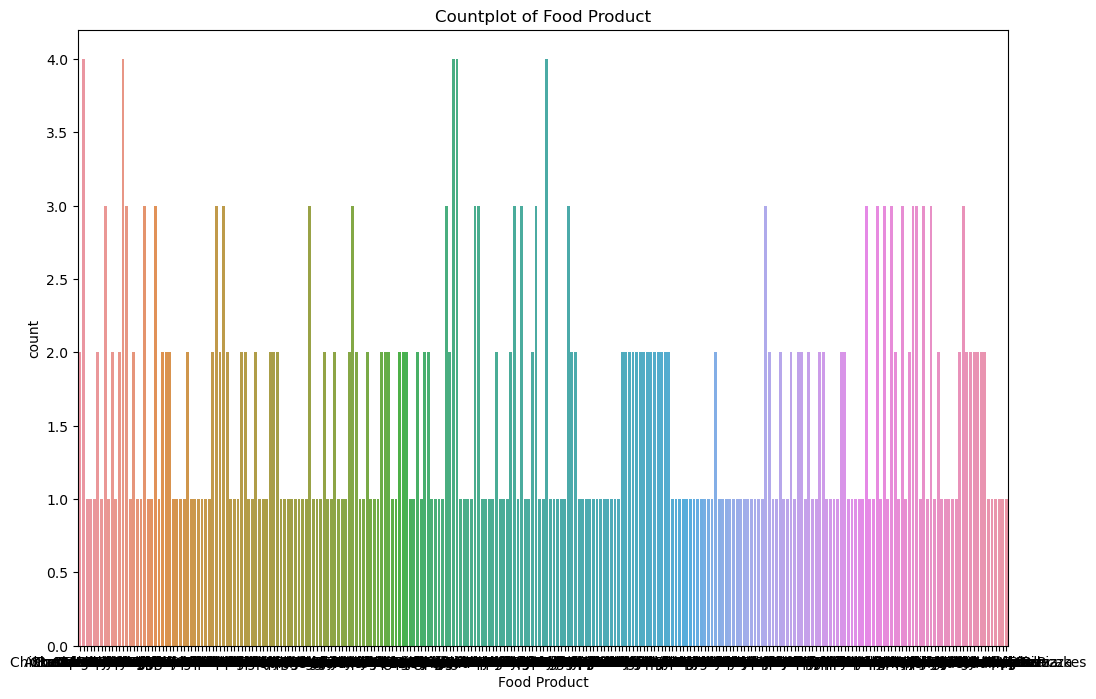

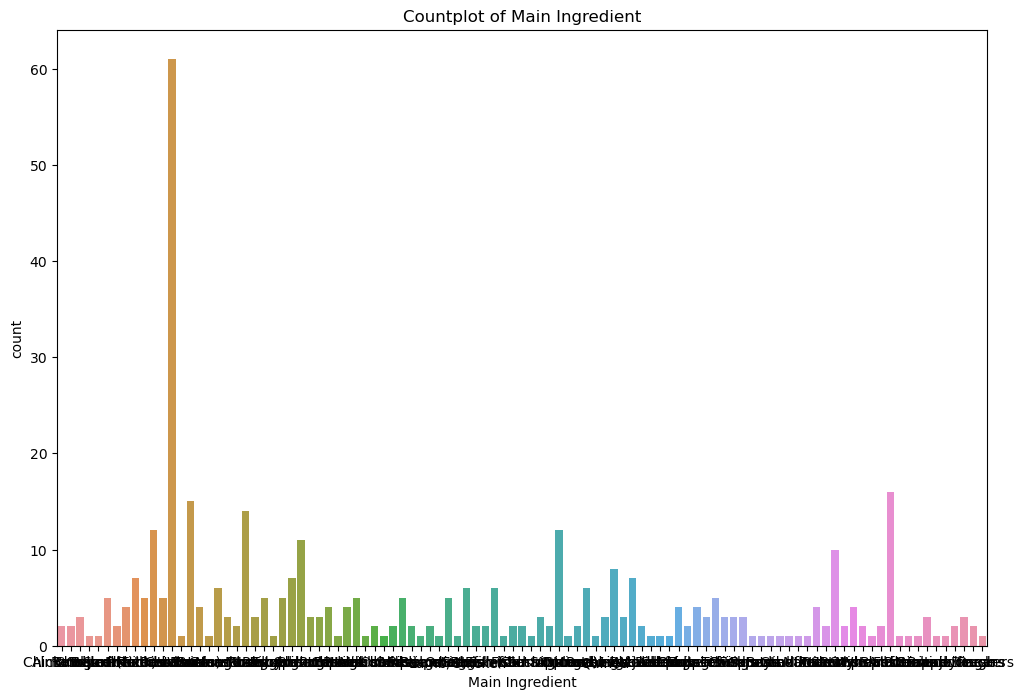

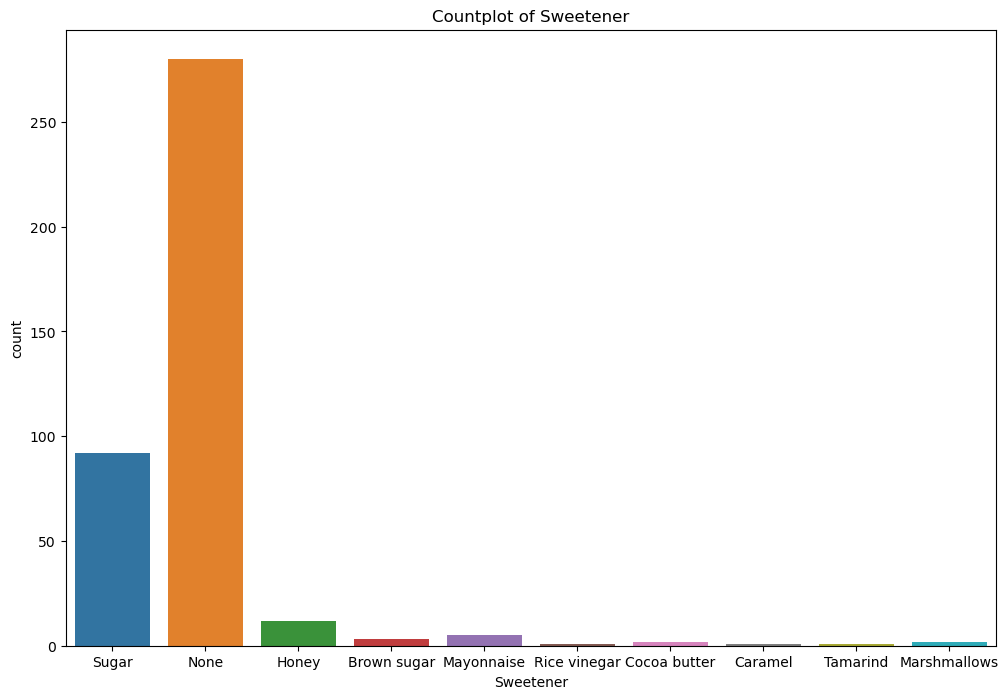

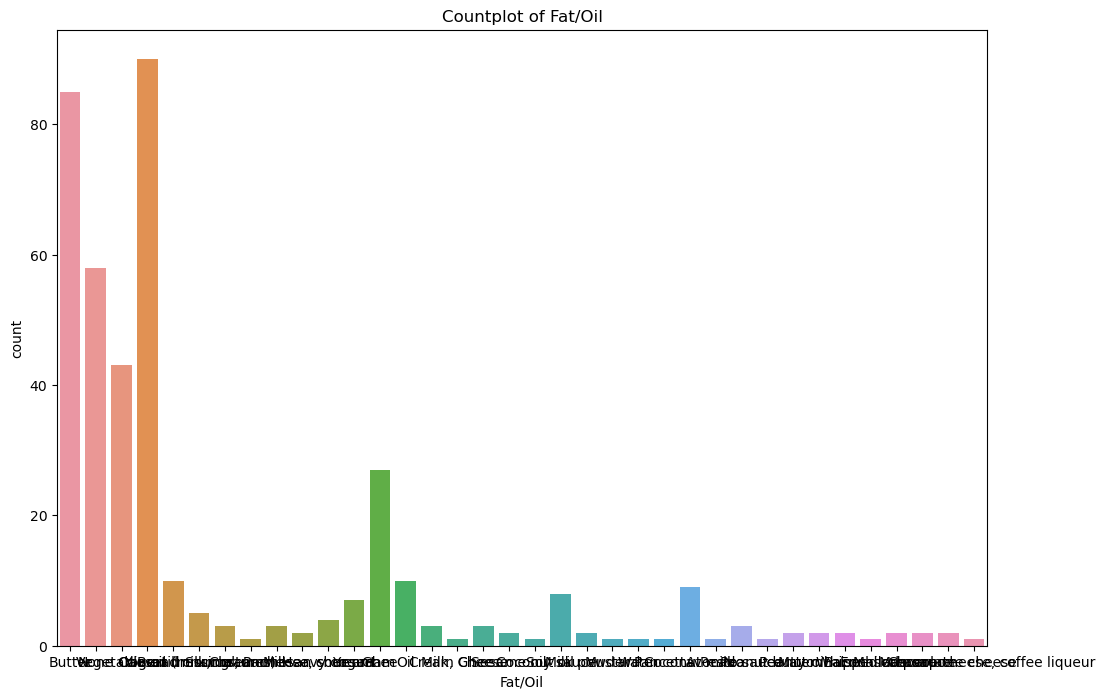

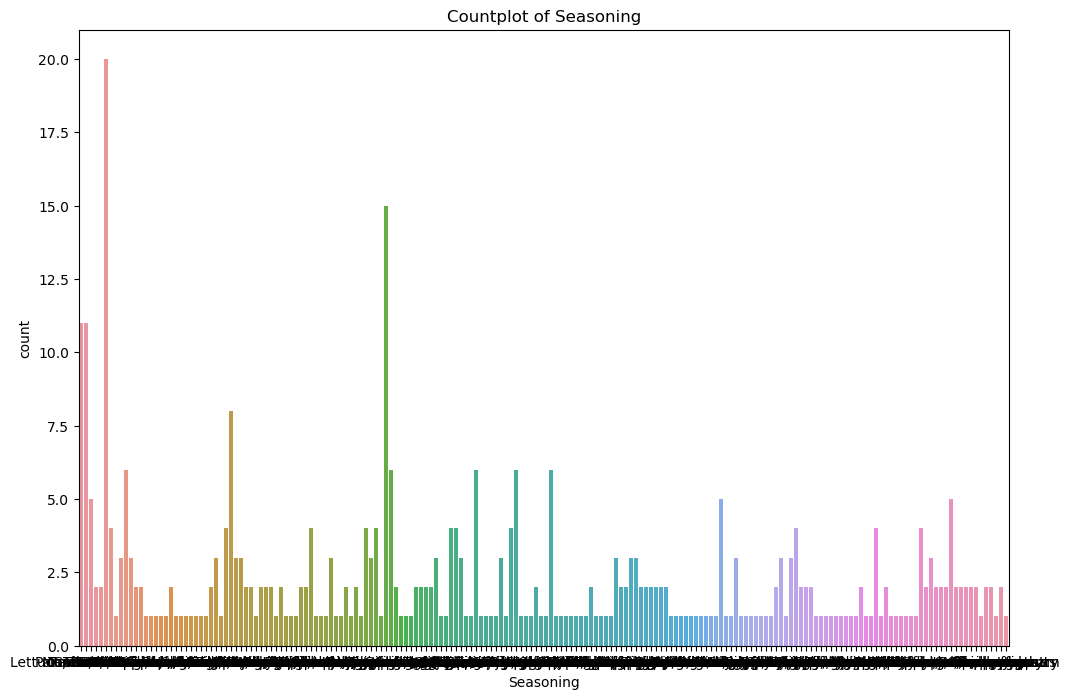

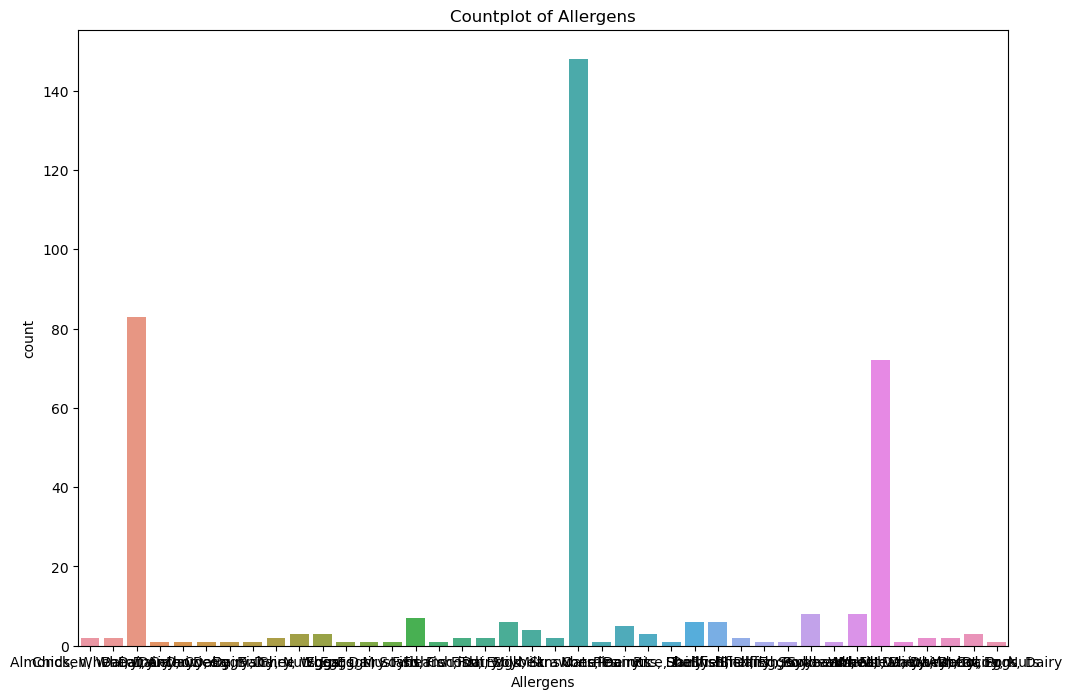

In [8]:
import warnings
warnings.filterwarnings("ignore")
# get list of categorical variables
cat_vars = ['Food Product', 'Main Ingredient', 'Sweetener', 'Fat/Oil', 'Seasoning', 'Allergens']

# create figure with subplots
fig_width = 12  # Desired width of the figure in inches
fig_height = 8 

# create histplot for each categorical variable
for column in cat_vars:
    fig, ax = plt.subplots(figsize=(fig_width, fig_height))  # Create a figure with custom size
    sns.countplot(x=column,  data=df,ax=ax)  # Generate the countplot using the axis object
    ax.set_title(f'Countplot of {column}')  # Set the title of the countplot
    
# show plot
plt.show()

<Axes: ylabel='count'>

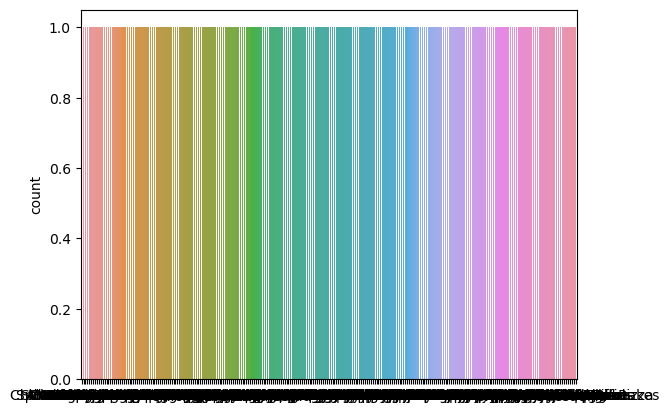

In [9]:
sns.countplot(x = df['Food Product'].unique())

In [10]:
df['Food Product'].nunique()

259

In [11]:
df['Food Product'].unique()

array(['Almond Cookies', 'Chicken Noodle Soup', 'Cheddar Cheese',
       'Ranch Dressing', 'Caramel Popcorn', 'Caesar Salad', 'Caesar Wrap',
       'Strawberry Smoothie', 'Cheese Pizza', 'Margherita Pizza',
       'Mashed Potatoes', 'Greek Yogurt', 'Caesar Salad Wrap',
       'Caprese Salad', 'Berry Smoothie', 'Berry Parfait',
       'Chicken Alfredo', 'Pesto Pizza', 'Beef Stroganoff',
       'Banana Smoothie', 'Watermelon Salad', 'Chicken Parmesan',
       'Mango Lassi', 'Greek Salad', 'Butternut Squash Soup',
       'Margherita Pasta', 'Greek Gyro Wrap',
       'Spinach and Feta Stuffed Chicken', 'Chicken Fettuccine Alfredo',
       'Caprese Sandwich', 'Mushroom Risotto', 'Greek Yogurt Parfait',
       'Eggplant Parmesan', 'Banana Pudding', 'Chicken Caesar Wrap',
       'Greek Spanakopita', 'Mushroom Soup', 'Spinach Artichoke Dip',
       'Chocolate Mousse', 'Stuffed Portobello Mushrooms',
       'Tandoori Chicken', 'Baked Garlic Parmesan Chicken',
       'Mushroom and Goat Cheese Fl

In [12]:
df['Food Product'].mode()

0       Caesar Salad Wrap
1           Chicken Curry
2     Chicken Noodle Soup
3             Ratatouille
4    Stuffed Bell Peppers
Name: Food Product, dtype: object

#### DATA PREPROCESSING (LABEL ENCODING)

In [13]:
df['Prediction'].unique()

array(['Contains', 'Does not contain', nan], dtype=object)

In [14]:
df['Prediction'].mode()

0    Contains
Name: Prediction, dtype: object

In [18]:
df['Prediction'].fillna('Contains', inplace=True)

In [19]:
df['Prediction'].unique()

array(['Contains', 'Does not contain'], dtype=object)

In [20]:
df['Prediction'] =np.where(df['Prediction'] == 'Contains',1,0)

In [21]:
df['Prediction'].unique()

array([1, 0])

In [23]:
from sklearn import preprocessing
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    
    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())
    
    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])
    
    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

Food Product: [  0  71  57 191  53  45  48 218  58 147 149 114  46  49  33  32  59 179
  25  19 254  72 144 112  42 146 108 216  67  50 155 115  98  18  63 113
 156 213  85 224 232  14 157 184  51  73 223  40 165 202 169  93 142  80
 118  68 141  92  69 150 192 189 126 193  62 186 229  11 101 107 161  96
 185  97  95  99  15 234 128 140  13 242 241 226 227 122 151 245 246 220
 240   3 164 212 121   8 187 251  20 100 134 105  26 137  64 196 177  78
 252 250 214  65 152 204 129 168  79 215  90   4   7  24  35  91 102 206
  66 145 135 116 221  28  43  52 230  22 176  21  77 257 231  23 239 188
 253  39 222 163 136  88 198 178  29 236 111  38  12 143 197  54 219 199
 120 110 225 132 131 109 201 195  81 248  34  86 148 205   1  61 243 170
 190 247  56 171 173 123  94  87 106 158 159  76 174 258 200 209 210 104
 130 181 138  47 182 139   9 208 211 238 153 237 233 228 255 256  70 162
  74 117   2 160 167  55  36  83  89 180   6  17 244   5 172  37 127 183
 154 103  30  16 125 133  75 166 217 

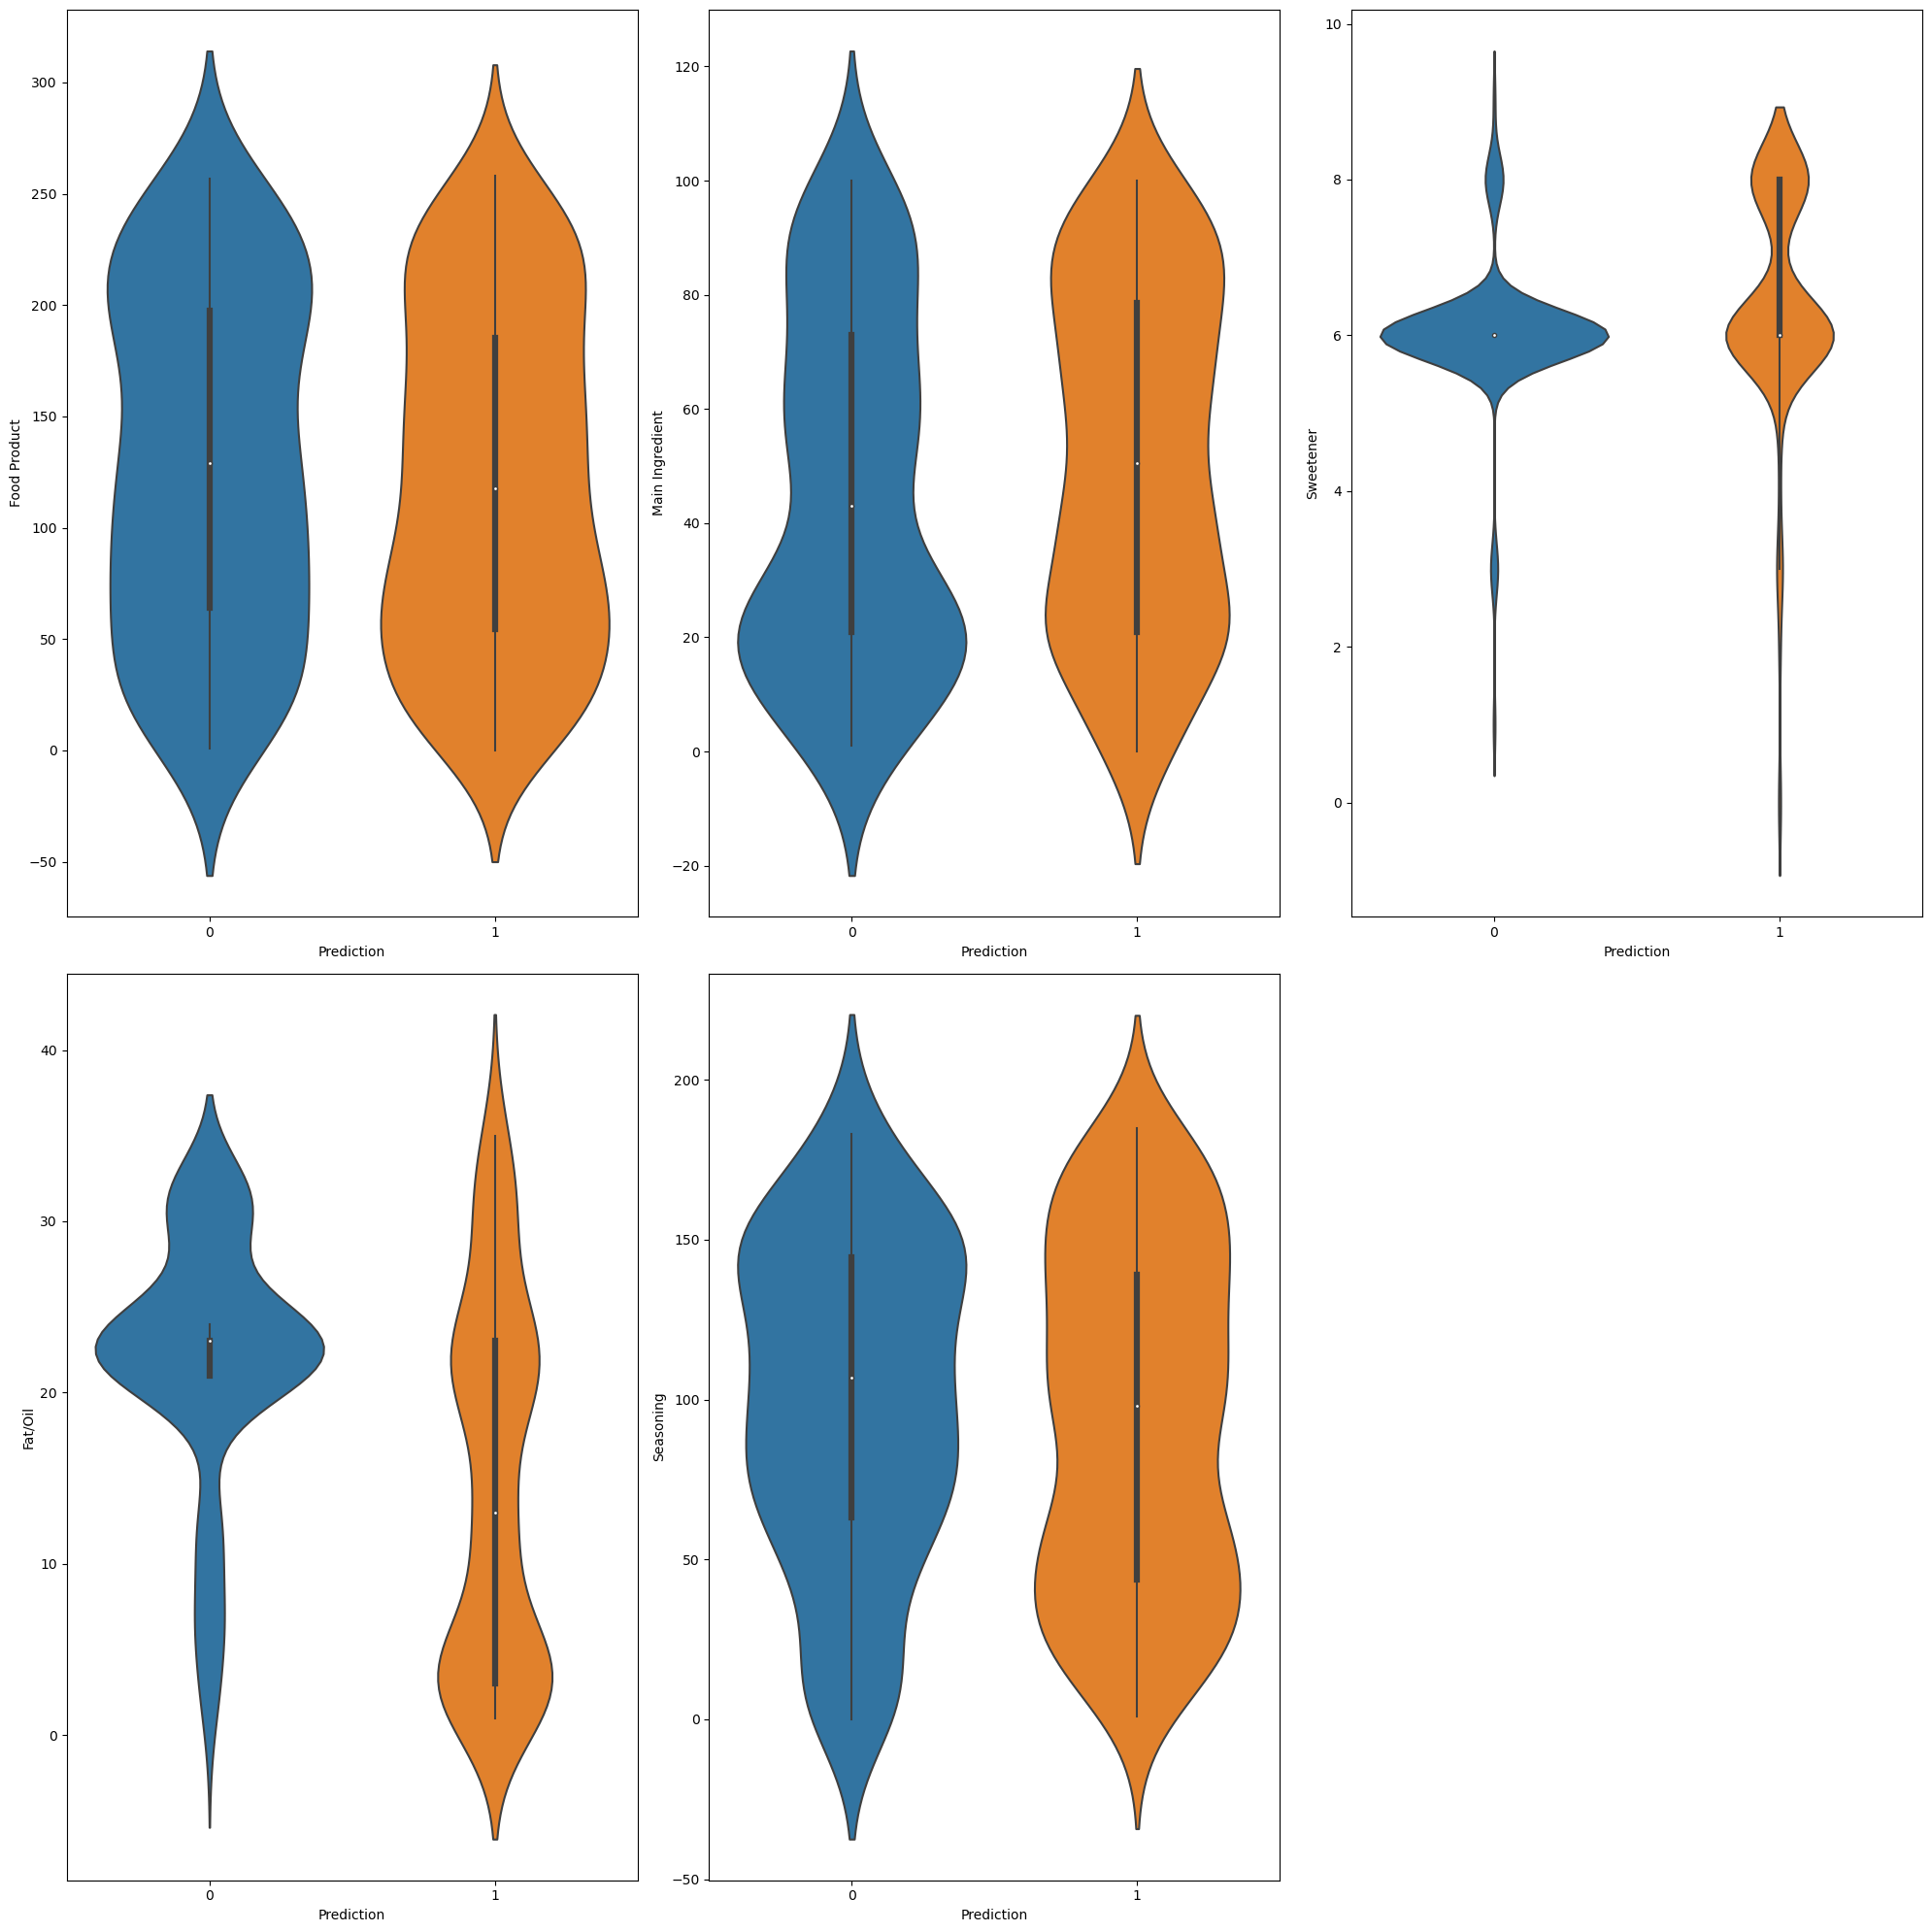

In [29]:
num_vars = ['Food Product', 'Main Ingredient', 'Sweetener', 'Fat/Oil', 'Seasoning', 'Allergens']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 20))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(y=var, data=df, x='Prediction', ax=axs[i])

fig.tight_layout()

# remove the 15th subplot
fig.delaxes(axs[5])

plt.show()

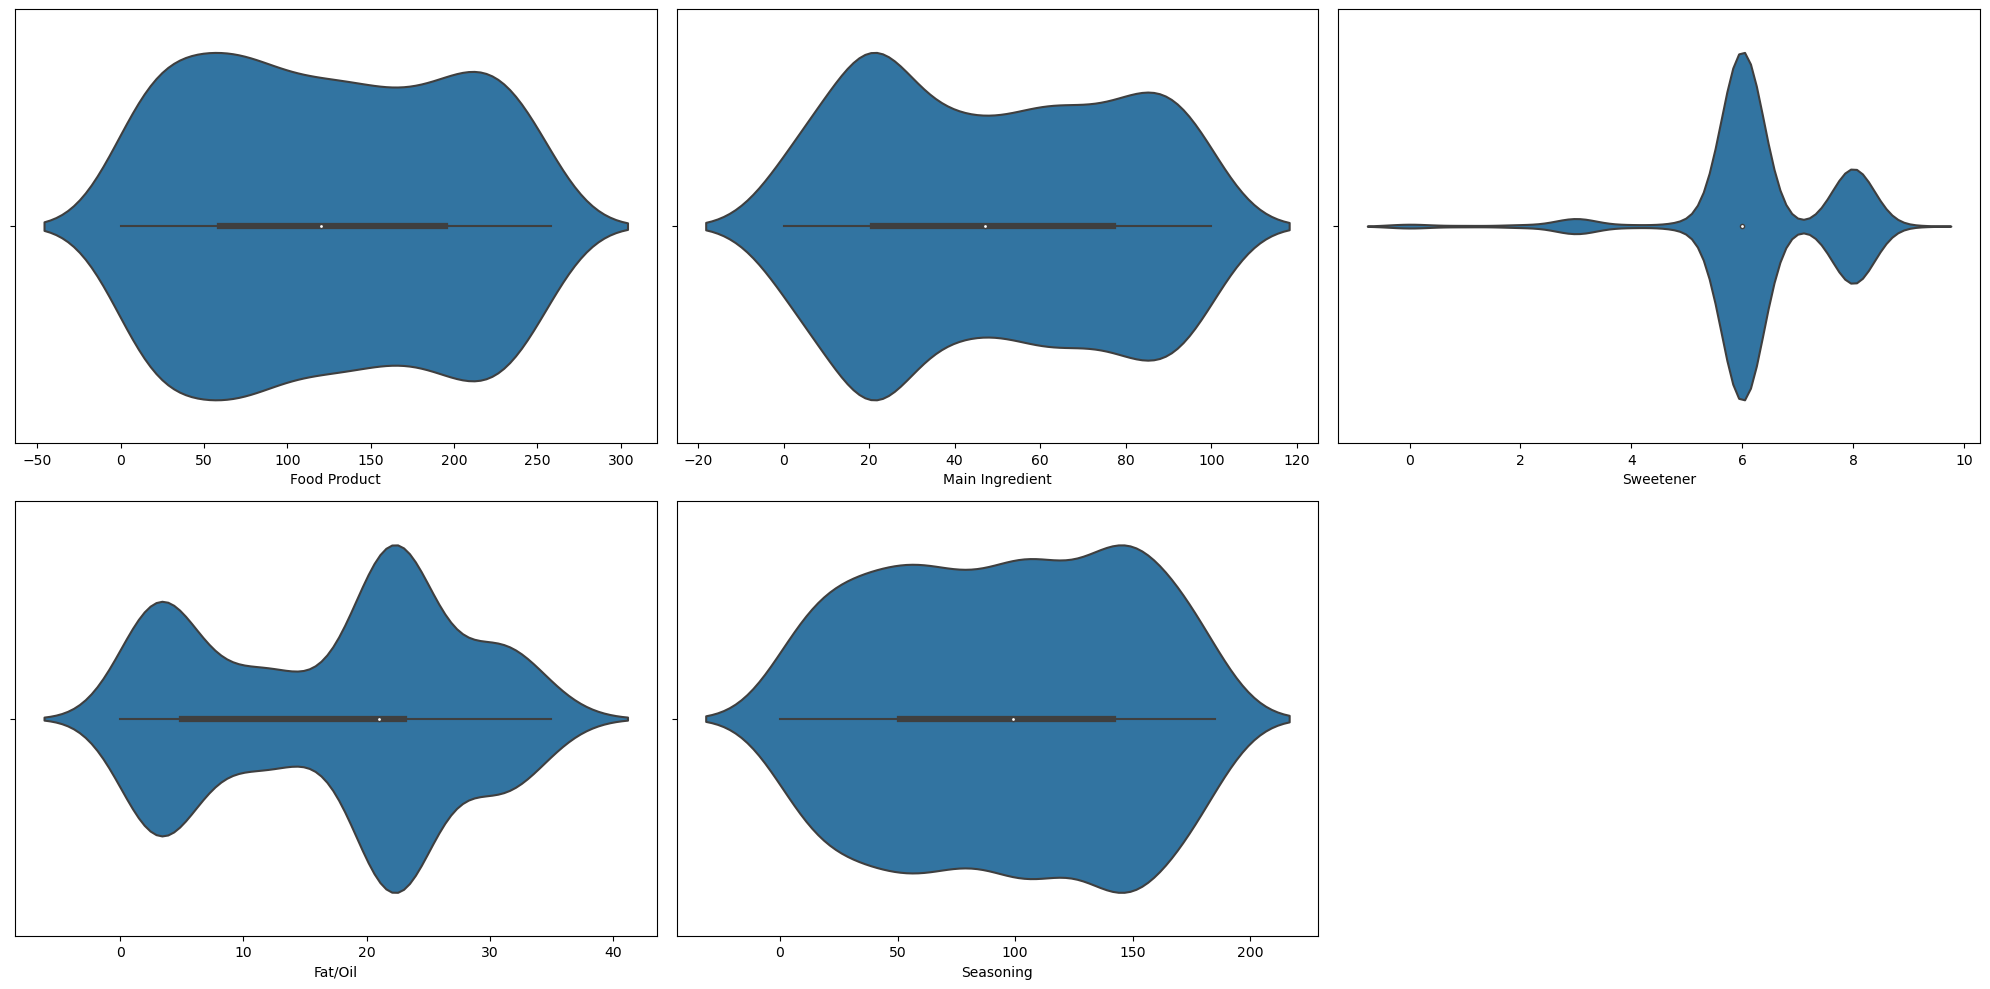

In [31]:
num_vars = ['Food Product', 'Main Ingredient', 'Sweetener', 'Fat/Oil', 'Seasoning', 'Allergens']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

# remove the 15th subplot
fig.delaxes(axs[5])

plt.show()

#### Feature Selection

In [33]:
#splitting the data to dependrnt and 
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [35]:
X

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens
0,0,0,8,3,57,0
1,0,0,8,3,57,0
2,71,23,6,21,139,1
3,71,23,6,21,139,1
4,57,20,6,21,139,2
...,...,...,...,...,...,...
394,127,48,8,3,58,37
395,175,68,8,3,41,38
396,256,100,8,3,35,38
397,17,5,8,3,35,38


In [37]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Prediction, dtype: int32

In [38]:
y.unique()

array([1, 0])

In [39]:
#Feature selection
from sklearn.feature_selection import SelectKBest, chi2
features= SelectKBest(score_func = chi2, k = 'all')
data_features = features.fit(X,y)
df_scores = pd.DataFrame(data_features.scores_, columns = ['scores'])
df_columns =pd.DataFrame(X.columns)

In [40]:
#conmcatenating the columns and scores
feature_rank = pd.concat([df_columns, df_scores],axis=1)
feature_rank.columns = ['Features','Score']
feature_rank

,Features,Score
0,Food Product,43.456607
1,Main Ingredient,66.541042
2,Sweetener,2.022668
3,Fat/Oil,282.150564
4,Seasoning,23.113016
5,Allergens,23.495071


In [42]:
#checkingforthe most correlated feature, mostly useful for large dataset
feature_rank.nlargest(7,'Score')

,Features,Score
3,Fat/Oil,282.150564
1,Main Ingredient,66.541042
0,Food Product,43.456607
5,Allergens,23.495071
4,Seasoning,23.113016
2,Sweetener,2.022668


<Axes: >

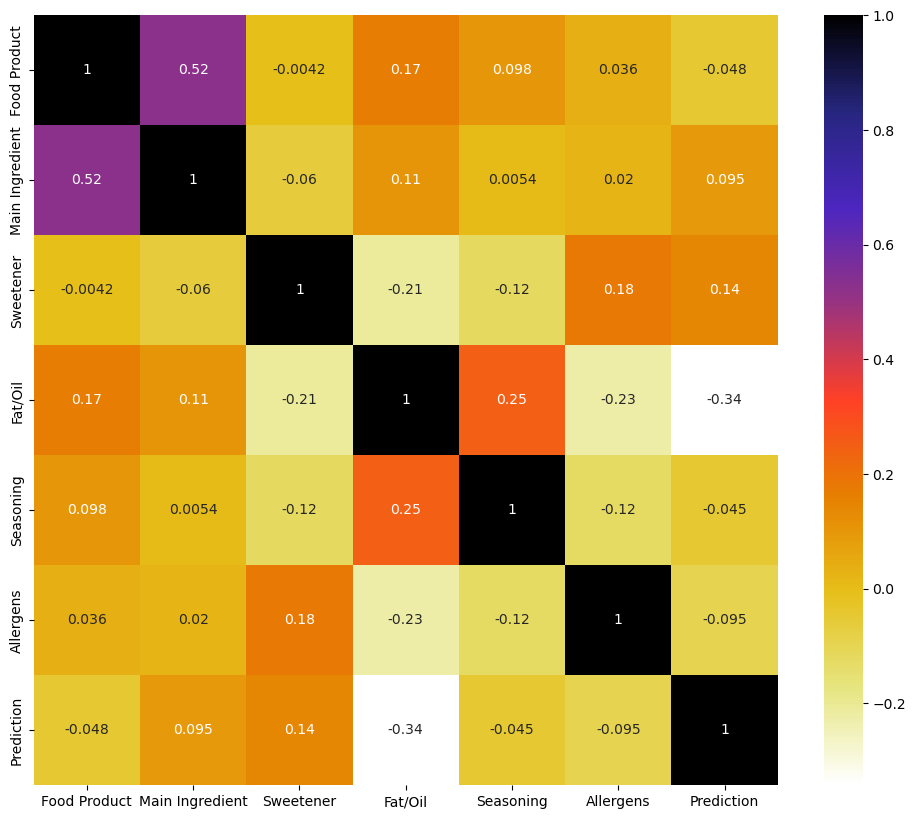

In [43]:
#plotting the heatmap to seethe correlationbetween the variables
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), annot = True, cmap =plt.cm.CMRmap_r )

we dont have highly correlated variables, if we had over 0.6/0.7 we would have set a threshold and pickone of the correlated variable

### Modeling

In [45]:
x = df.loc[:,['Food Product', 'Main Ingredient', 'Sweetener', 'Fat/Oil', 'Seasoning', 'Allergens']]
y = df['Prediction']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=11)

In [48]:
x_train.shape, x_test.shape

((279, 6), (120, 6))

#checking for the top ten most important columns
imp_df = pd.DataFrame({
    "Feature Name": x_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

In [51]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(x_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


#### Prediction Evaluation

In [52]:
print(grid_search.best_params_)

{'n_neighbors': 1}


In [53]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 74.21%


In [54]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X, y)

y_test_hat=knn.predict(x_test) 

test_accuracy=accuracy_score(y_test,y_test_hat)*100

print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 100.00%


In [56]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(grid,x_train, y_train,values_format='d' )

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\Honour Jesus\Anaconda3\New folder\lib\site-packages\sklearn\metrics\__init__.py)

In [57]:
!pip install plot_confusion_matrix

ERROR: Could not find a version that satisfies the requirement plot_confusion_matrix (from versions: none)
ERROR: No matching distribution found for plot_confusion_matrix


Text(0.5, 1.0, 'Accuracy Score for KNN: 0.7916666666666666')

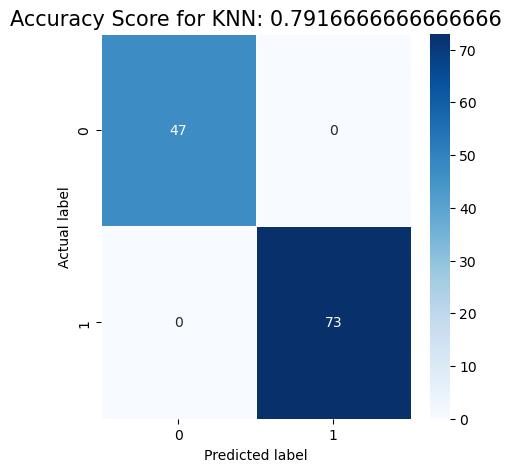

In [61]:
#getting and plotting the confusion matrix graph
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_hat)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for KNN: {0}'.format(grid.score(x_test, y_test))
plt.title(all_sample_title, size = 15)

those correctly predicted has contains allergen is 47 and those correctly predicted has doesnt contain allergenis 73

In [64]:
print(confusion_matrix(y_test,y_test_hat))
print(classification_report(y_test,y_test_hat))

[[47  0]
 [ 0 73]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        73

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



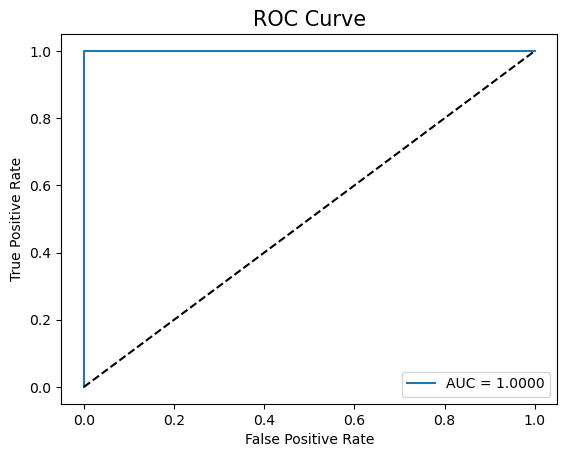

In [66]:
#getting the auc  and plotting the roc curve
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = knn.predict_proba(x_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

In [68]:
#hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(class_weight='balanced')
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': None, 'max_features': None, 'n_estimators': 100, 'random_state': 0}


In [70]:
#modeling
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators=200, class_weight='balanced')
rfc.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

#### Prediction Evaluation

In [71]:
y_pred = rfc.predict(x_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 96.67 %


In [72]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.9666666666666667
Precision Score :  0.9666666666666667
Recall Score :  0.9666666666666667
Jaccard Score :  0.9354838709677419
Log Loss :  1.2014551129705717


In [74]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[46  1]
 [ 3 70]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        47
           1       0.99      0.96      0.97        73

    accuracy                           0.97       120
   macro avg       0.96      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



Text(0.5, 1.0, 'Accuracy Score for RFC: 0.9666666666666667')

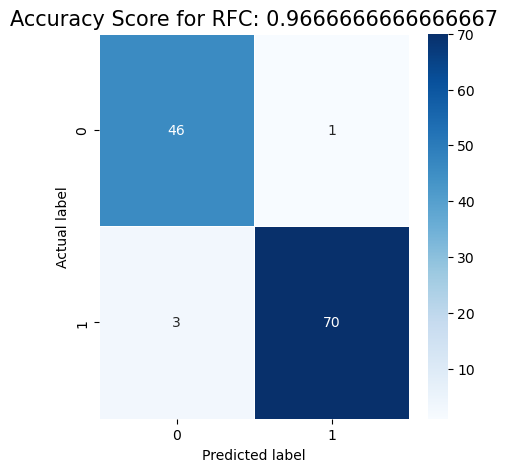

In [76]:
#getting and plotting the confusion matrix graph
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for RFC: {0}'.format(rfc.score(x_test, y_test))
plt.title(all_sample_title, size = 15)

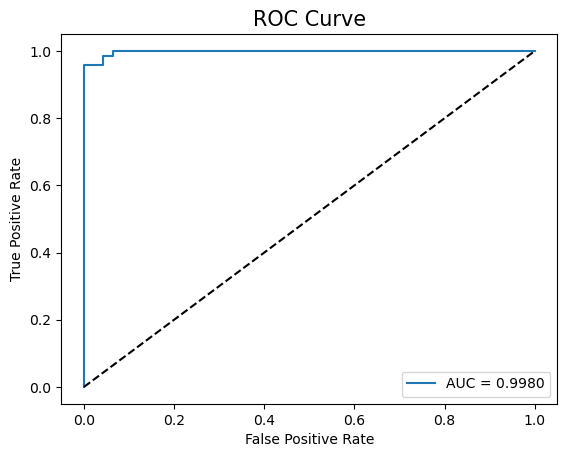

In [78]:
#getting the auc  and plotting the roc curve
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rfc.predict_proba(x_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

#### Conclusion
The Random Forest Model classified the dataset better with greater accuracy,roc,auc,confusion matrix and classification report, than the KneighbourClassifier

Acording to the confusion matrix 70 were correctly classifed as contains allergen while 46 are also correctly classified has not having allergen while are 3 classifed has having allergen while they dont and 1 was classifed has not having while it did

In [79]:
#prep for deployment
#open a file to store your data
import pickle
file=open('Food Allergen Classification.pkl','wb')
#dump information to the file
pickle.dump(rfc, file)